# Fear/Greed index 

## what is it?

It is a chart used by traders to see the general trends in the BTC market. Fear is any number below 50 and greed is any number higher. 

## How is it calculated?

The Fear/Greed index takes 6 sources of data to determine the number for that given day. Those sources are

* Social media (15%)
* Market volatility(25%)
* Market volume/momentum(25%)
* Surveys(15%)
* Trends(10%)
* Dominance(10%)

## API

Example URL: GET https://api.alternative.me/fng/?limit=10&format=csv&date_format=us






In [73]:
import pandas as pd
import numpy as np
import json

In [74]:
# Load the last year of fear/greed
fear_data = pd.read_csv('data_folder/fear-greed.csv')
df = pd.DataFrame(fear_data)
df.head()

,date,fear-greed-ammount,trend
0,04-28-2021,59,Greed
1,04-27-2021,50,Neutral
2,04-26-2021,27,Fear
3,04-25-2021,31,Fear
4,04-24-2021,37,Fear


<AxesSubplot:>

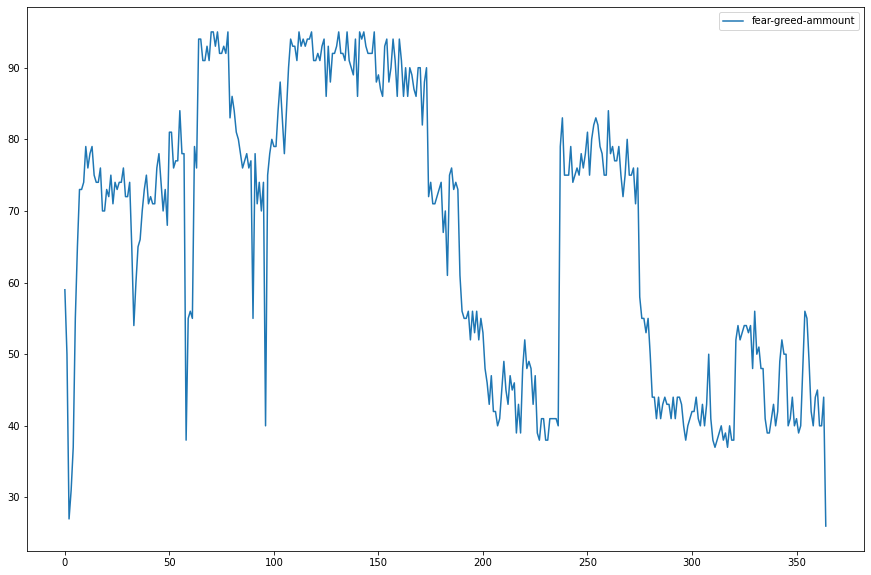

In [75]:
df.plot(figsize=(15,10))

## Fear/Greed index as a gauge

This would rely on a daily value, which could be pulled from a single API query and not the full data set.

In [8]:
import plotly.graph_objects as go
import requests

# Queries Today and Yesterday for FG value
api_call = requests.get('https://api.alternative.me/fng/?limit=2&date_format=us')

api_call = api_call.json()
# print(api_call)

# Today's values
fg_value = api_call['data'][0]['value']
fg_class = api_call['data'][0]['value_classification']

#Yesterday's values
yes_fg_value = api_call['data'][1]['value']
yes_fg_class = api_call['data'][1]['value_classification']

color_set = ''

if int(fg_value) > 60:
    color_set = 'green'
elif int(fg_value) >= 40 and int(fg_value) < 60:
        color_set='yellow'
else:
    color_set='red'
        
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = int(fg_value),
    mode = "gauge+number+delta",
    title = {'text': "Fear/Greed BTC"},
    delta = {'reference': int(yes_fg_value) },
    gauge = {'bar':{'color':color_set},
                'axis': {'range': [None, 100]},
             'steps' : [
                 {'range': [0, 40], 'color': "pink"},
                 {'range': [40, 60], 'color': 'lightyellow'},
                 {'range': [60, 100], 'color': "lightgreen"}],}))

fig.show()